In [2]:
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
#manually edited name of the second Port James to "Port James (2)" to avoid merge errors
city_df=pd.read_csv("city_data.csv")
ride_df=pd.read_csv("ride_data.csv")
city_df['city'][100]='Port James (2)'


/Users/Luke/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
df=pd.merge(ride_df,city_df,how='inner')

In [5]:
fare_mean_df=df.groupby(df['city']).mean()['fare']

In [6]:
total_rides_df=df.groupby(df['city']).count()['ride_id']

In [7]:
total_drivers_df=city_df[['city','driver_count']]

In [8]:
city_type=type_df=city_df[['city','type']]

In [9]:
total_rides_df=total_rides_df.reset_index()
fare_mean_df=fare_mean_df.reset_index()

In [10]:
merge_df=pd.merge(total_rides_df,fare_mean_df,on='city').rename(columns={'ride_id':'rides'})
merge_df=pd.merge(merge_df,city_type,on='city')
merge_df=pd.merge(merge_df,total_drivers_df,on='city')
merge_df

,city,rides,fare,type,driver_count
0,Alvarezhaven,31,23.928710,Urban,21
1,Alyssaberg,26,20.609615,Urban,67
2,Anitamouth,9,37.315556,Suburban,16
3,Antoniomouth,22,23.625000,Urban,21
4,Aprilchester,19,21.981579,Urban,49
5,Arnoldview,31,25.106452,Urban,41
6,Campbellport,15,33.711333,Suburban,26
7,Carrollbury,10,36.606000,Suburban,4
8,Carrollfort,29,25.395517,Urban,55
9,Clarkstad,12,31.051667,Suburban,21


In [11]:
merge_df_U=merge_df.loc[merge_df['type']=='Urban',:]
merge_df_S=merge_df.loc[merge_df['type']=='Suburban',:]
merge_df_R=merge_df.loc[merge_df['type']=='Rural',:]


/Users/Luke/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  if __name__ == '__main__':
/Users/Luke/anaconda/envs/PythonData/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/Luke/anaconda/envs/PythonData/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


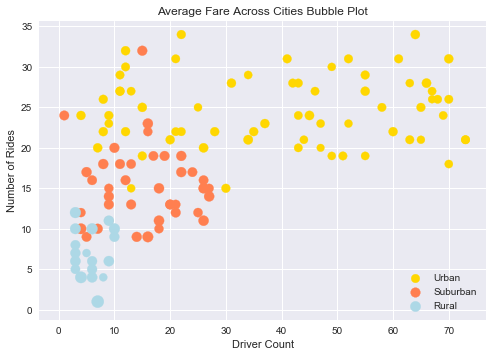

In [25]:
plt.hold(True)
plt.scatter(x=merge_df_U['driver_count'],y=merge_df_U['rides'],s=merge_df_U['fare']*3,color='gold', label="Urban")
plt.scatter(x=merge_df_S['driver_count'],y=merge_df_S['rides'],s=merge_df_S['fare']*3, color='coral', label="Suburban")
plt.scatter(x=merge_df_R['driver_count'],y=merge_df_R['rides'],s=merge_df_R['fare']*3, color='lightblue', label="Rural")
plt.title('Average Fare Across Cities Bubble Plot')
plt.xlabel('Driver Count')
plt.ylabel('Number of Rides')
plt.legend(loc='lower right')
plt.show()